In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os. walk('/kaggle/input'):
    print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [35]:
df1 = pd.read_csv('C:\\Users\\kisha\\Desktop\\study_performance.csv')

In [36]:
df1.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
df1.shape

(1000, 8)

In [38]:
# Check missing values
df1.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [39]:
#Check Duplicates
df1.duplicated().sum()

0

In [40]:
#Check Null and Dtypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [41]:
#Check the number of unique  values of each column
df1.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [42]:
#Check statistic of data  set
df1.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


EDA (Exploratory data analysis)

In [43]:
print("Categories in 'gender' variable:     ",end=" " )
print(df1['gender'].unique())

print("Categories in 'race_ethnicity' variable:   ",end=" ")
print(df1['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df1['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df1['lunch'].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df1['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [44]:
#define numerical & categorical colums
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype =='O']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features),categorical_features))
print('\nWe have {}  categorical features : {}' .format(len(categorical_features), categorical_features))

We have 3 numerical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

We have 5  categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [45]:
df1['total score'] = df1['math_score'] + df1['reading_score'] + df1['writing_score']
df1['average'] = df1['total score']/3
df1.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [46]:
reading_full = df1[df1['reading_score'] == 100]['average'].count()
writing_full = df1[df1['writing_score'] == 100]['average'].count()
math_full = df1[df1['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in reading: 17


In [47]:
reading_less_20 = df1[df1['reading_score'] <= 20]['average'].count()
writing_less_20 = df1[df1['writing_score'] <= 20]['average'].count()
math_less_20 = df1[df1['math_score'] <= 20]['average'].count()


print(f'Numbers of students with less than 20 marks in Maths: {math_less_20}')
print(f'Numbers of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Numbers of students with less than 20 marks in Writing: {writing_less_20}')

Numbers of students with less than 20 marks in Maths: 4
Numbers of students with less than 20 marks in Reading: 1
Numbers of students with less than 20 marks in Writing: 3


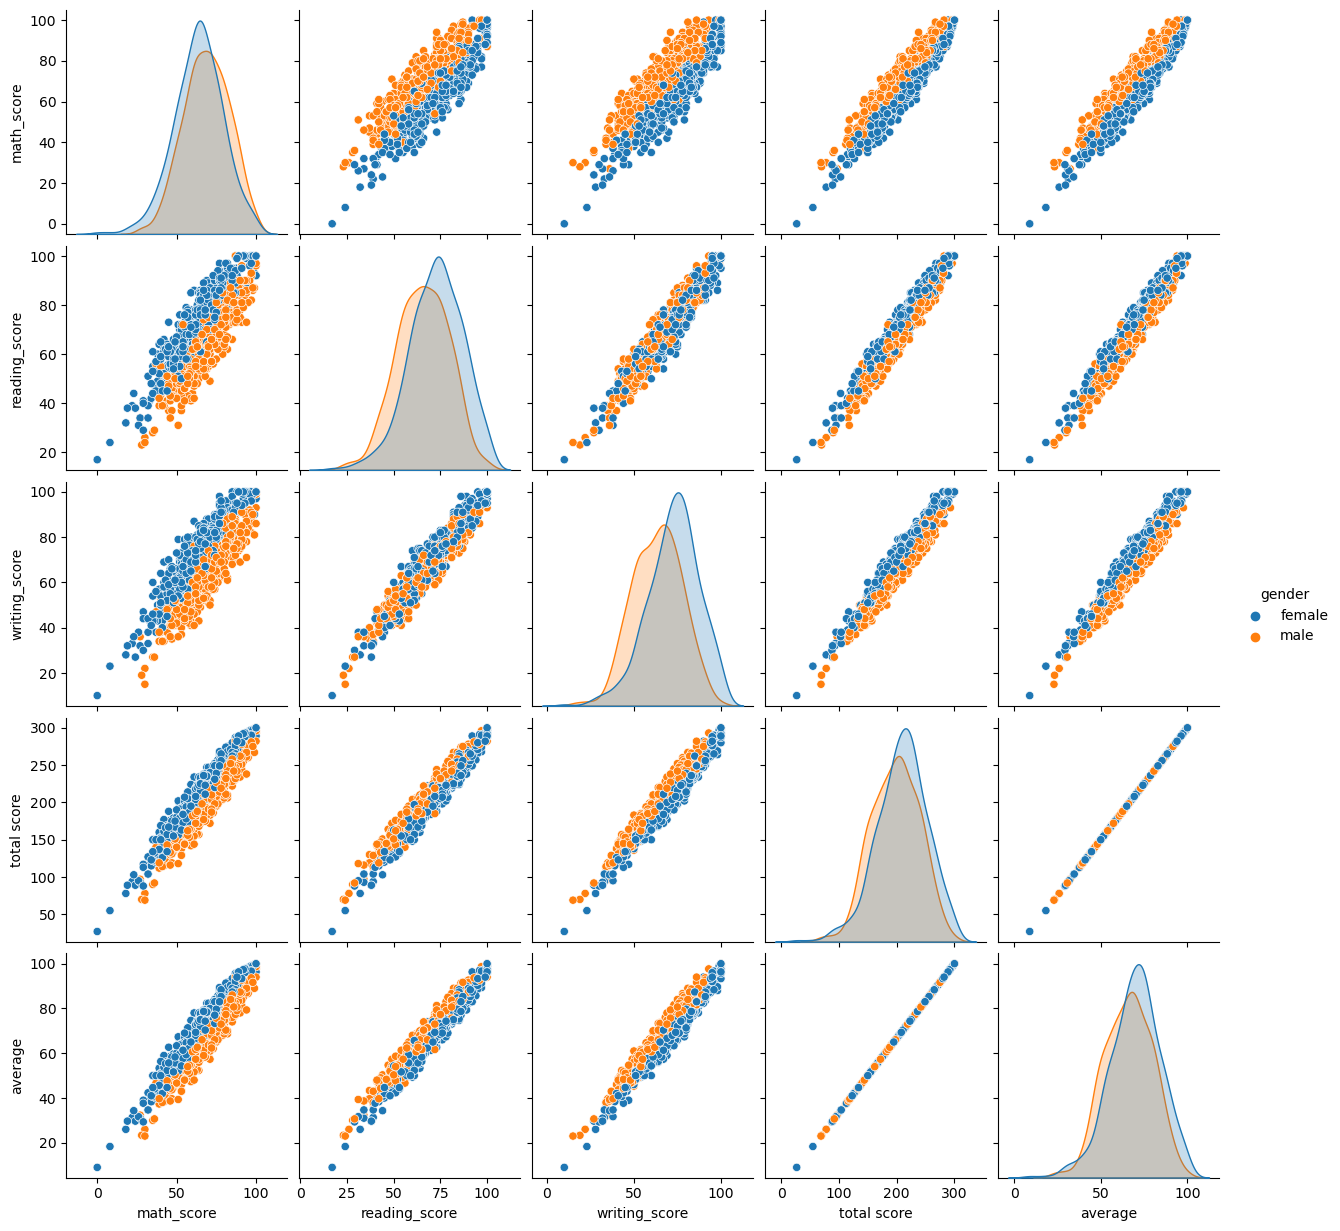

In [48]:
sns.pairplot(df1,hue = 'gender')
plt.show()

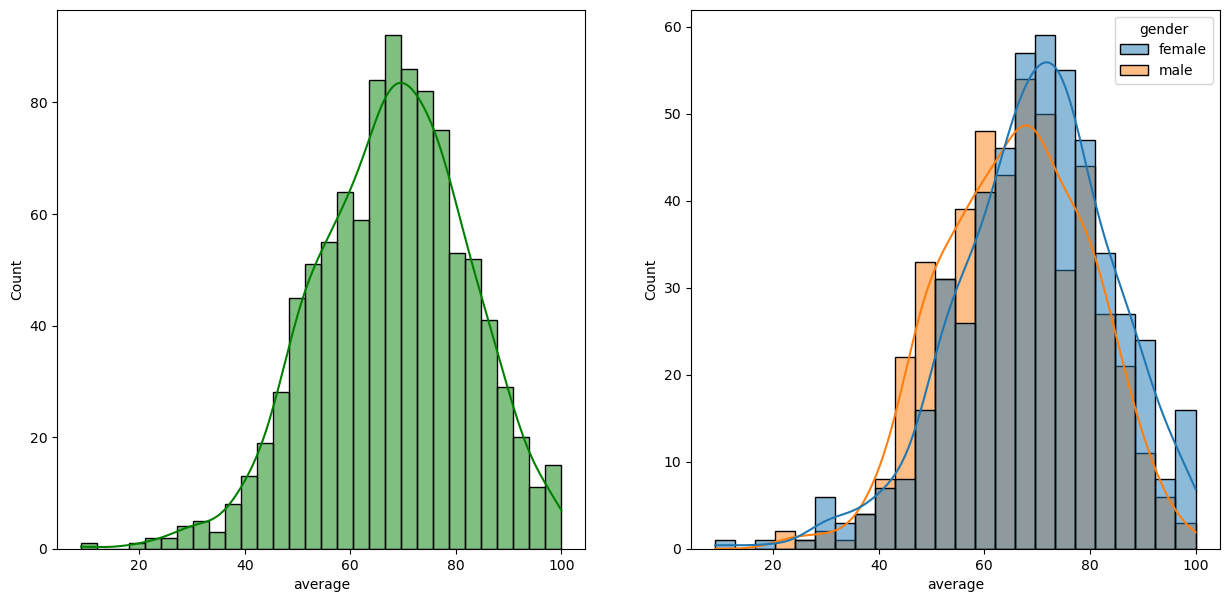

In [49]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df1,x='average',kde=True,hue ='gender')
plt.show()

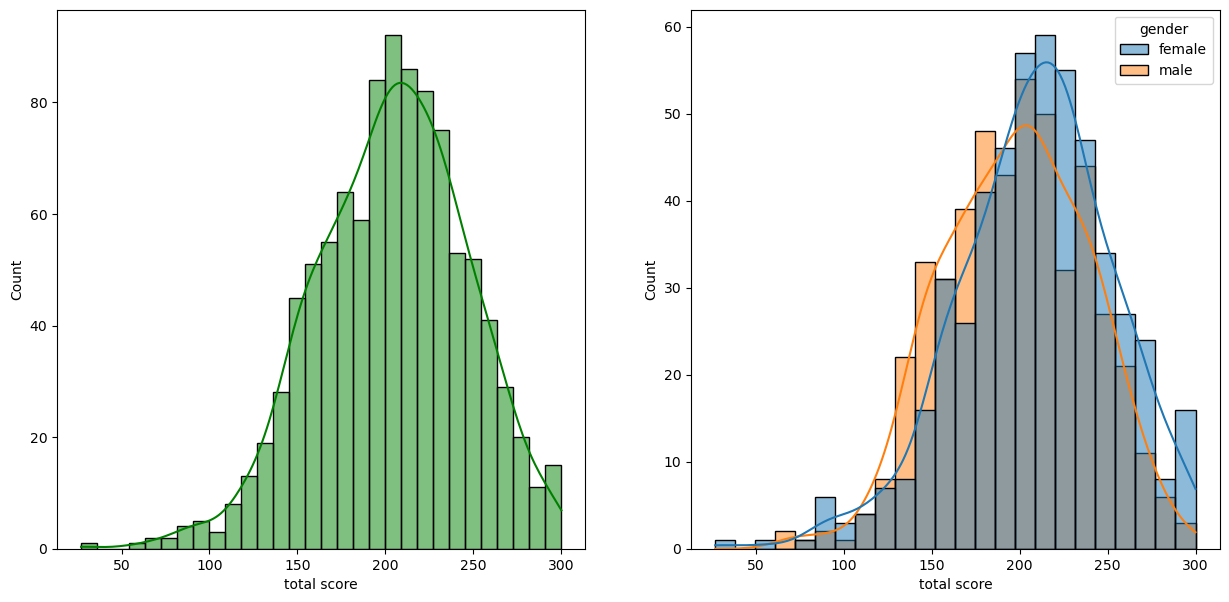

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1, x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df1,x='total score',kde=True,hue='gender')
plt.show()


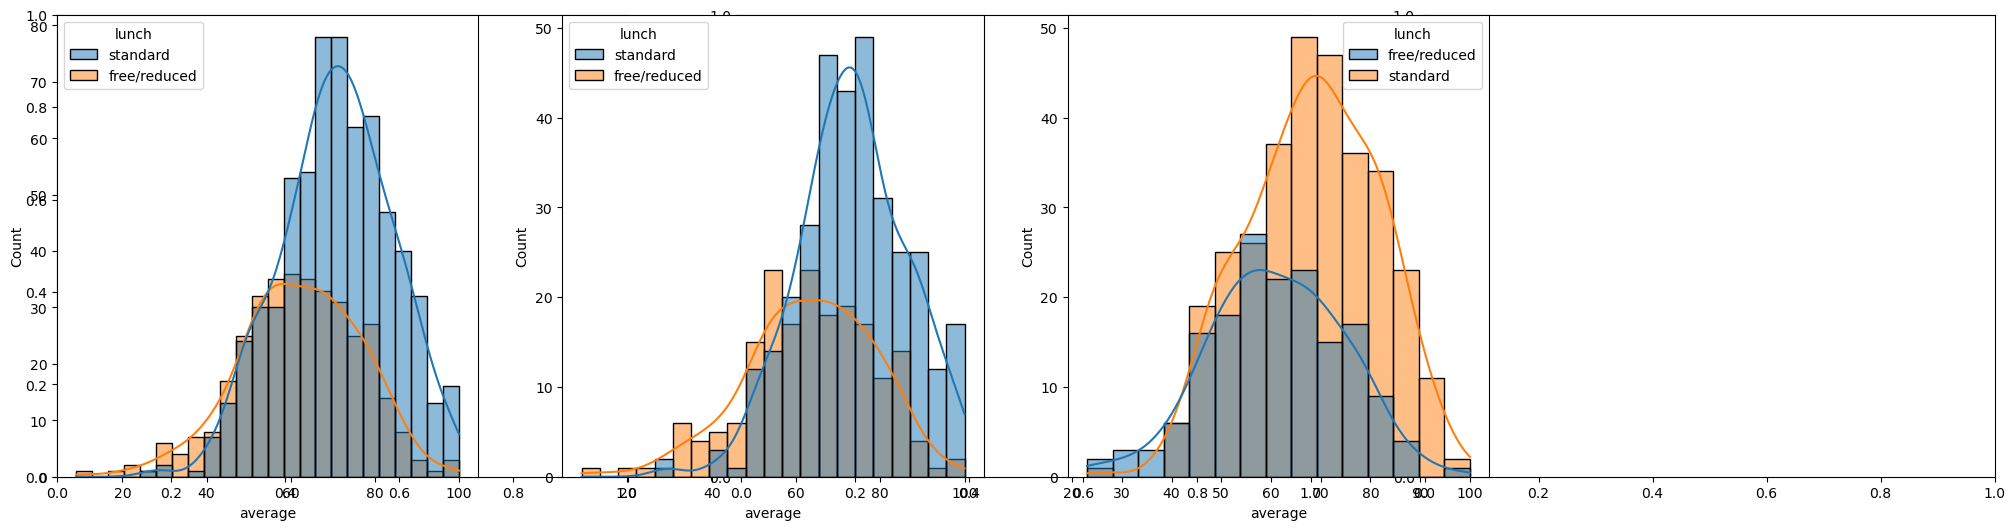

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df1,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df1[df1.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df1[df1.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

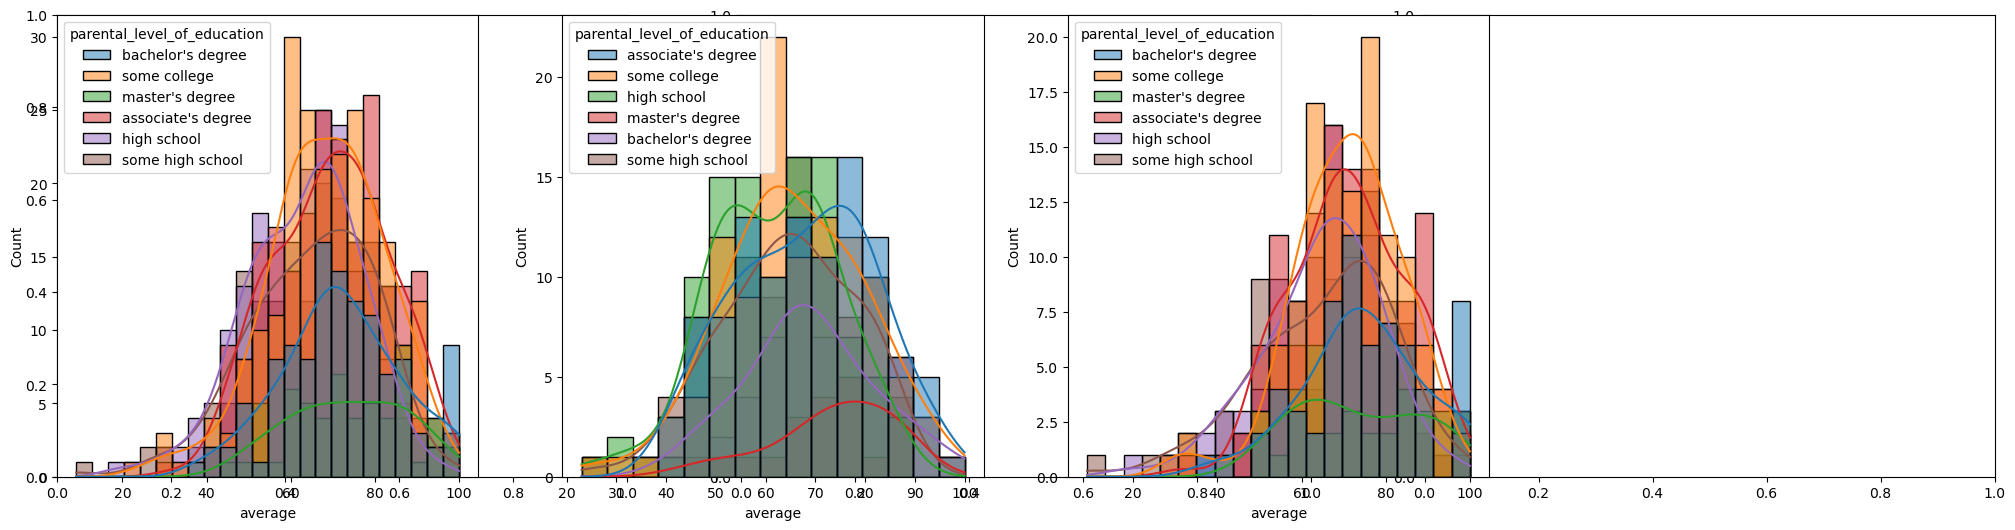

In [52]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df1,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df1[df1.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df1[df1.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

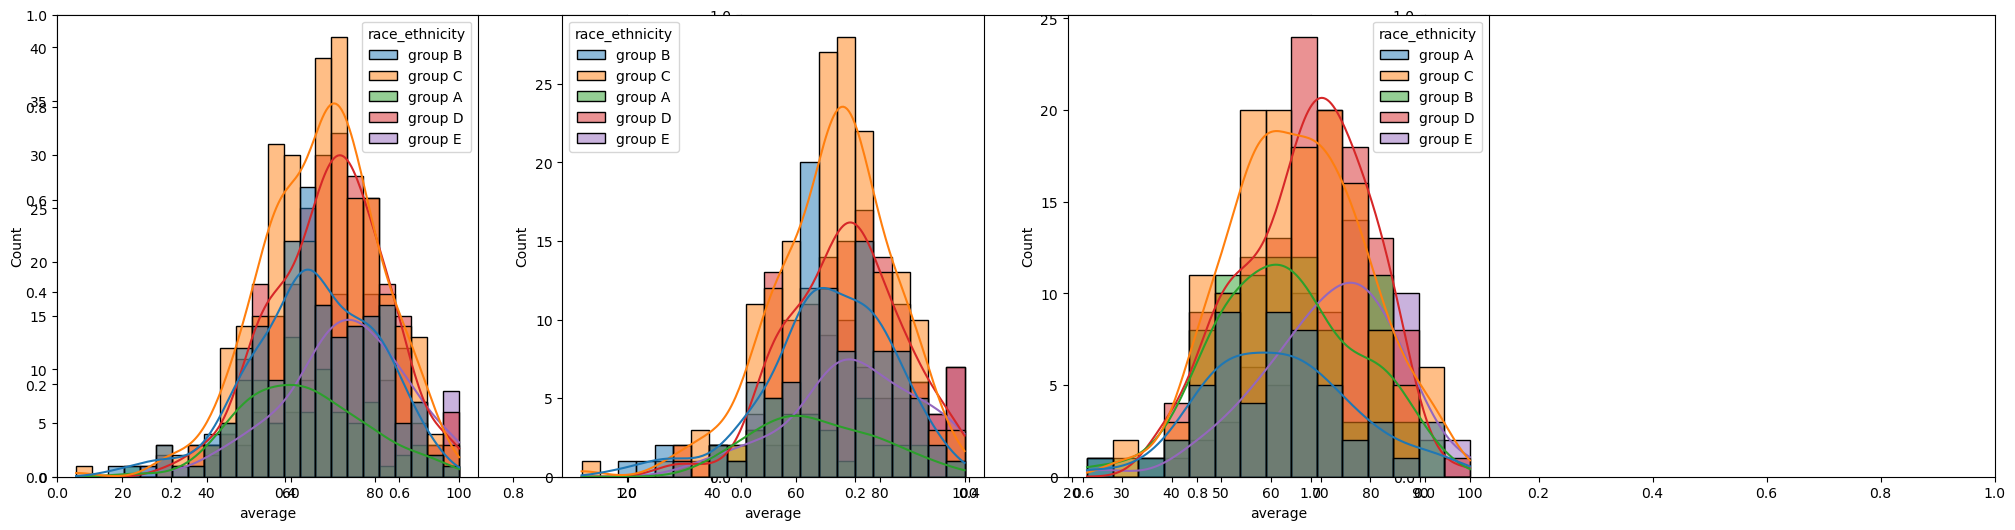

In [53]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df1,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df1[df1.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df1[df1.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()


Maximum score of students in all three subjects

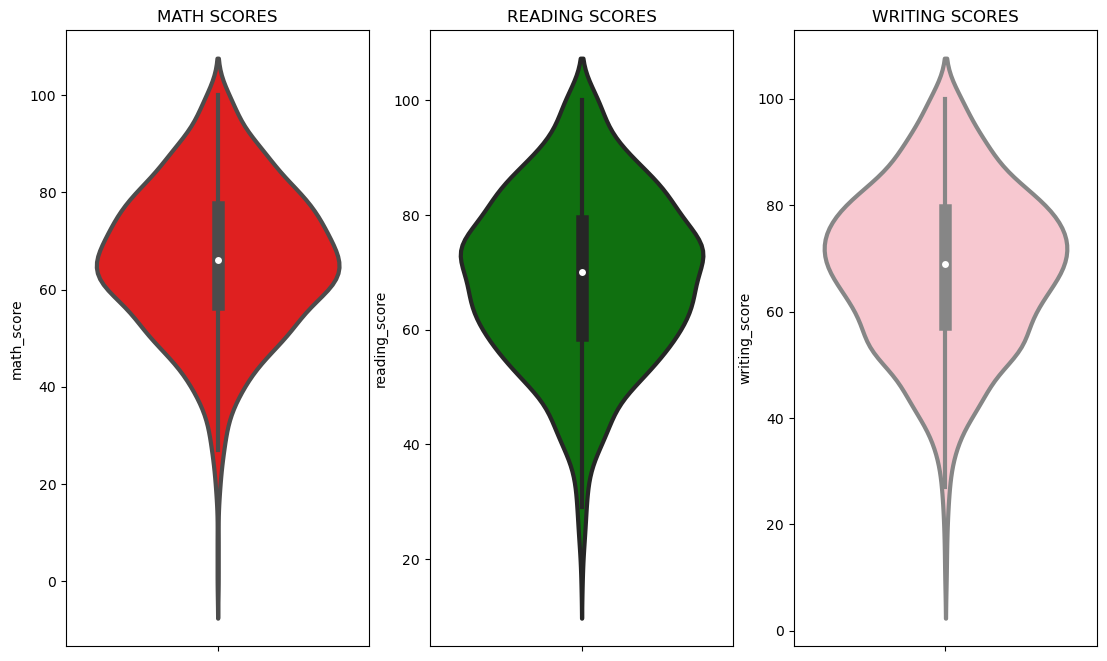

In [54]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df1,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df1,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df1,color='pink',linewidth=3)
plt.show()

Multivariate analysis using pieplot

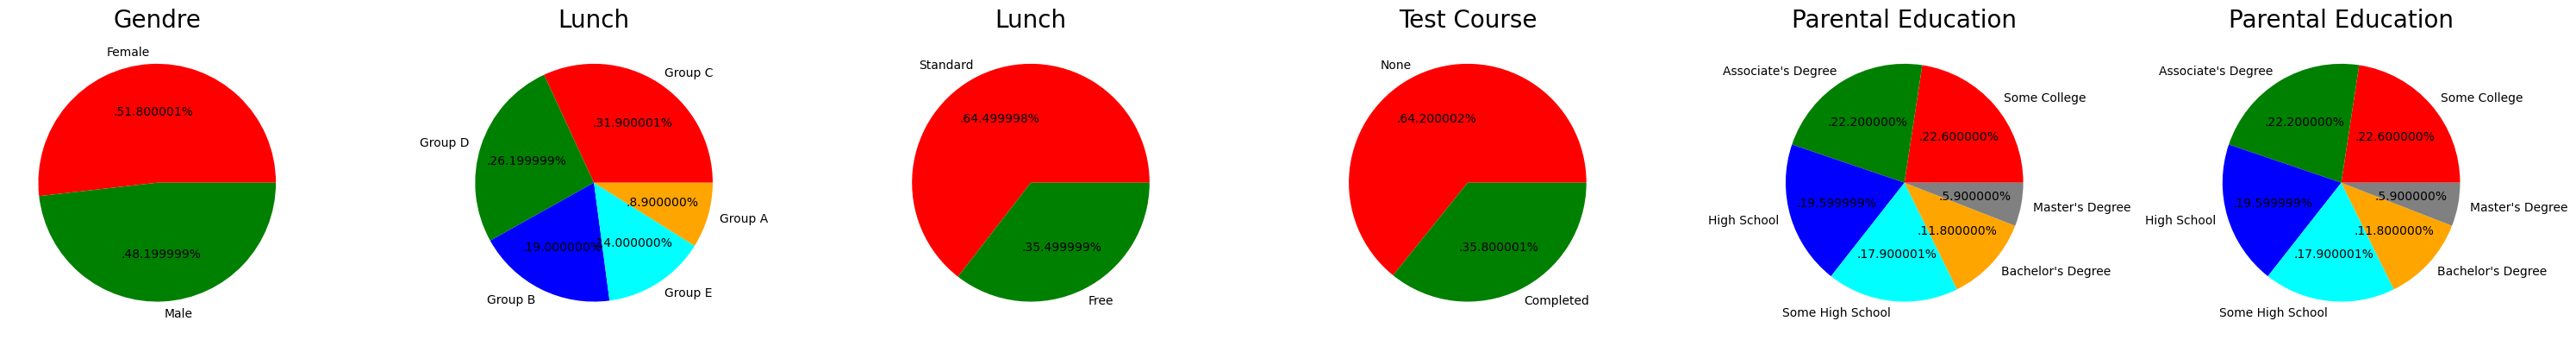

In [55]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 6, 1)
size =df1['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct ='.%1f%%')
plt.title('Gendre', fontsize =20)
plt.axis('off')

###################################################################

plt.subplot(1, 6, 2)
size = df1['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

##################################################################

plt.subplot(1, 6, 3)
size = df1['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

###################################################################

plt.subplot(1, 6, 4)
size = df1['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct ='.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

##################################################################

plt.subplot(1, 6, 5)
size = df1['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School',"Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','gray']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

##################################################################

plt.subplot(1, 6, 6)
size = df1['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School',"Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','gray']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('on')

##################################################################

plt.tight_layout()
plt.grid()

plt.show()

Data Preprocessing

In [56]:
x = df1.drop(columns=['math_score'],axis=1)
y = df1['math_score']

In [57]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

num_features, cat_features

(Index(['reading_score', 'writing_score', 'total score', 'average'], dtype='object'),
 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
        'test_preparation_course'],
       dtype='object'))

In [66]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler",numeric_transformer, num_features),
    ]
)


In [67]:
x = preprocessor.fit_transform(x)

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [73]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 21), (800,), (200, 21), (200,))

In [ ]:
Model-Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [77]:
model = model.fit(x_train, y_train)

In [79]:
y_pred = model.predict(x_test)

In [91]:
# y_pred_series = pd.Series(y_pred)
# count = y_pred_series.value_counts()
# print(count)

In [ ]:
########Evaluation

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [101]:
mae, rmse, r2 = evaluate_model(y_test, y_pred)
print('model perfomance for training set')
print("- Root Mean Squared Error: {:.4f}".format(rmse))
print("- Mean Absolute Error: {:.4f}".format(mae))
print("- R2 Score: {:.4f}".format(r2))

model perfomance for training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Text(0, 0.5, 'Predicted')

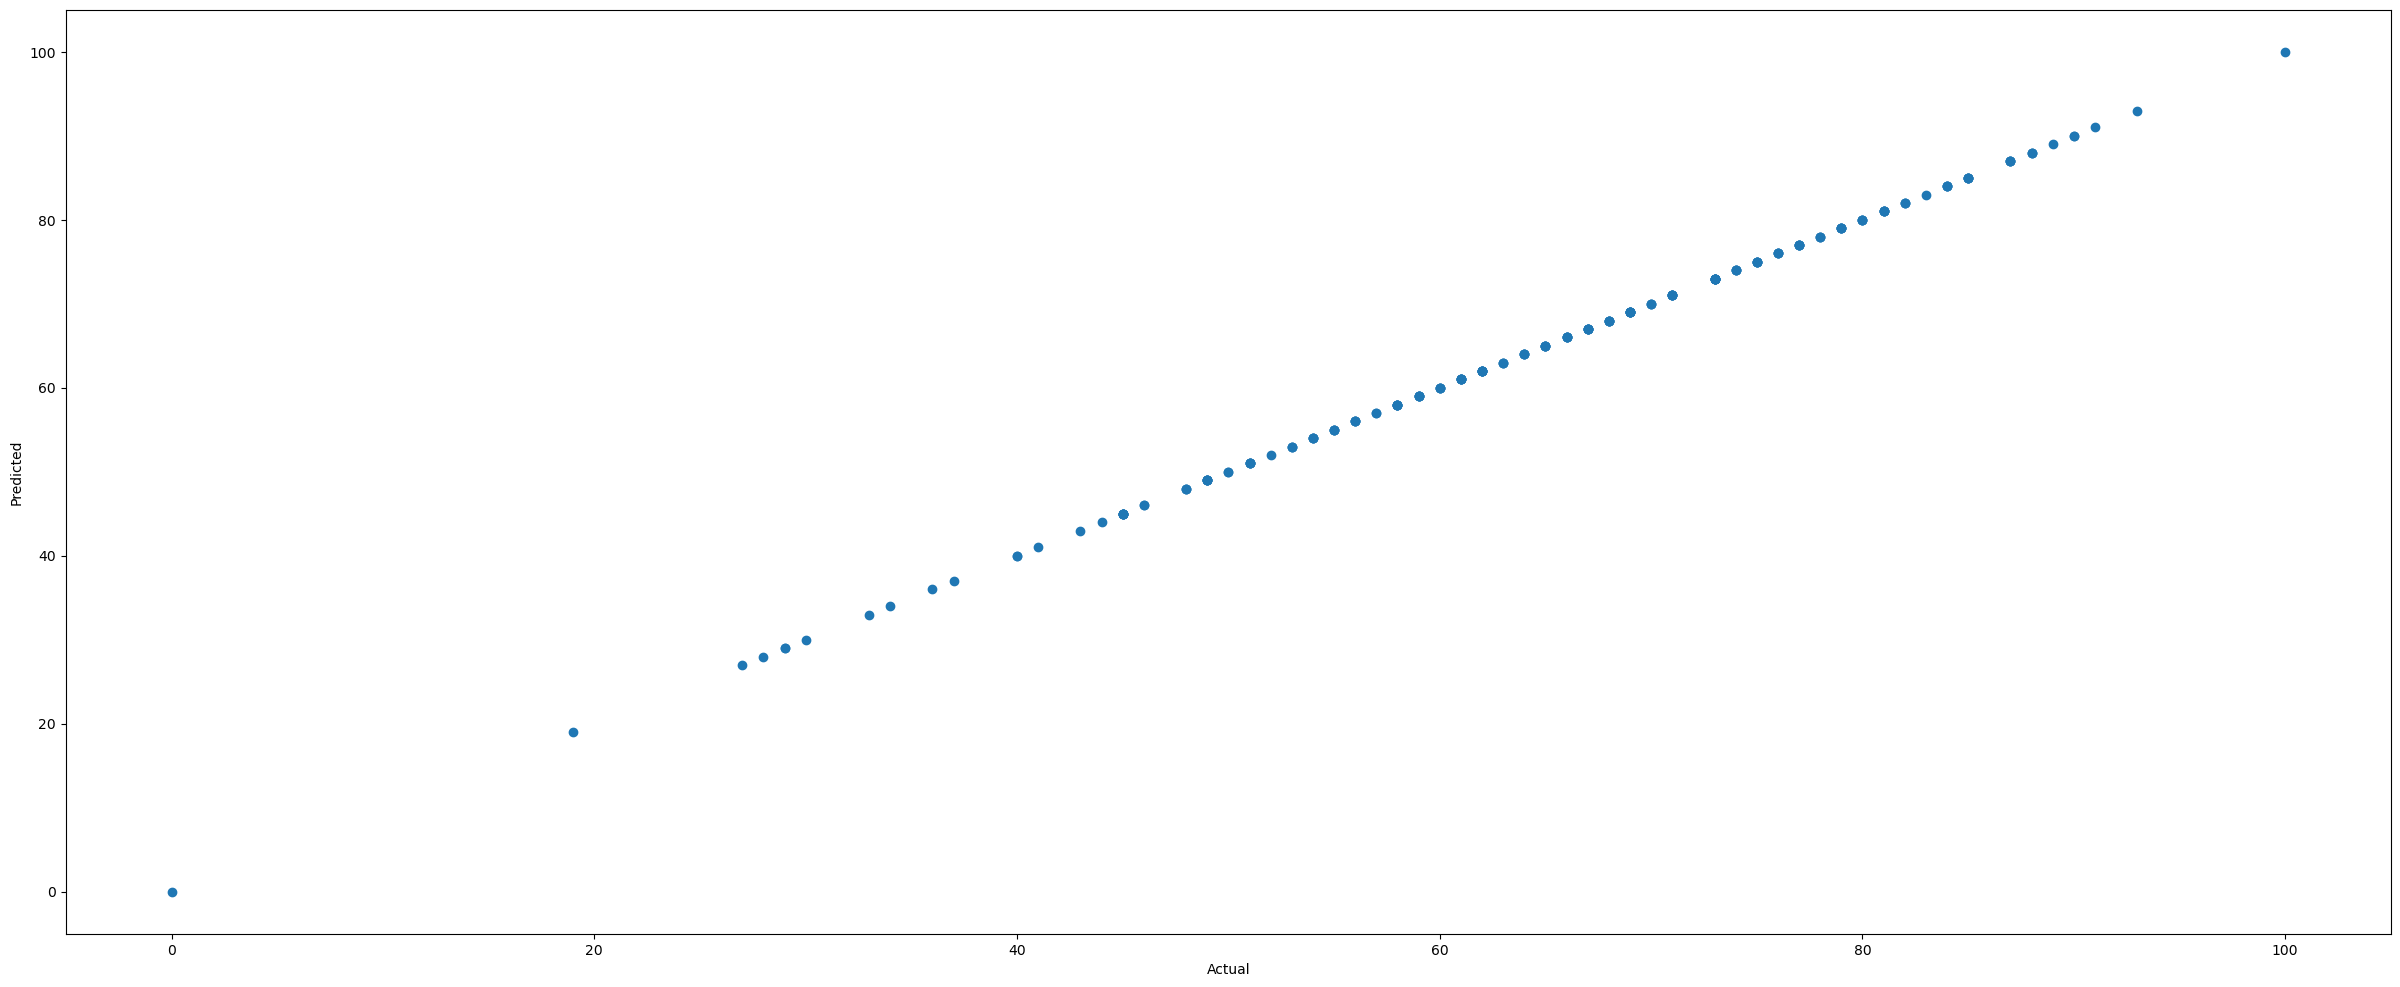

In [102]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

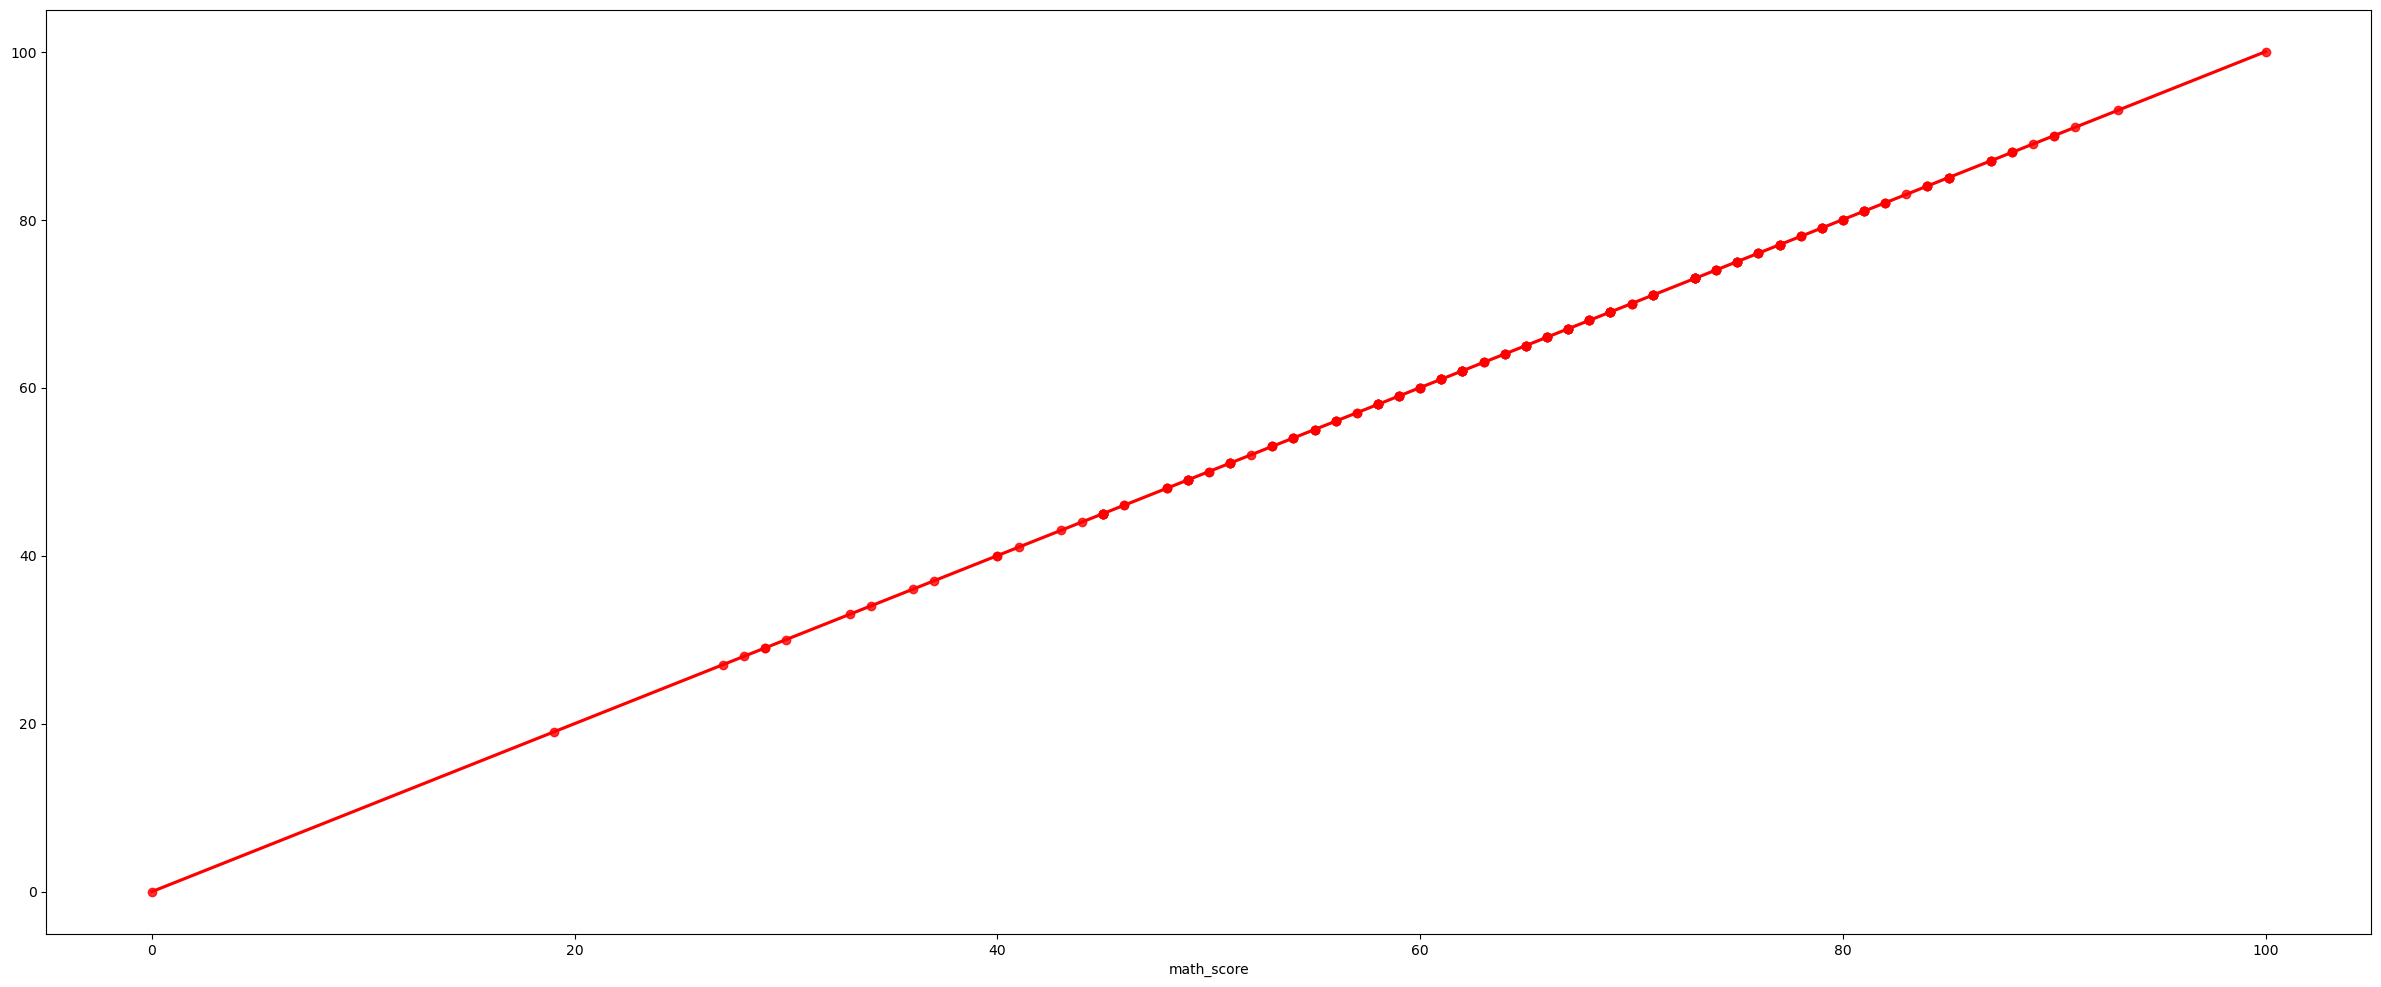

In [106]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')